# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [10]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [4]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
60000 train samples
10000 test samples


Create the MLP

In [6]:
model = Sequential()
model.add(Dense(9, input_shape=(784,), activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

C:\Users\Anthony\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │         7,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,165 (27.99 KB)

 Trainable params: 7,165 (27.99 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [7]:
from keras.src.optimizers import *

batch_size = 64
n_epoch = 90

model.compile(loss='categorical_crossentropy', optimizer=AdamW(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.3)

Epoch 1/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4460 - loss: 1.8323 - val_accuracy: 0.8320 - val_loss: 0.9895
Epoch 2/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8422 - loss: 0.8771 - val_accuracy: 0.8646 - val_loss: 0.6314
Epoch 3/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8724 - loss: 0.5867 - val_accuracy: 0.8804 - val_loss: 0.4975
Epoch 4/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8870 - loss: 0.4758 - val_accuracy: 0.8893 - val_loss: 0.4305
Epoch 5/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.8982 - loss: 0.4138 - val_accuracy: 0.8960 - val_loss: 0.3880
Epoch 6/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9035 - loss: 0.3740 - val_accuracy: 0.9005 - val_loss: 0.3635
Epoch 7/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9111 - loss: 0.3376 - val_accuracy: 0.9034 - val_loss: 0.3439
Epoch 8/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9139 - loss: 0.3240 - val_accuracy: 

Show the performance of the model

Test score (loss): 0.27311646938323975
Test accuracy: 0.9215999841690063


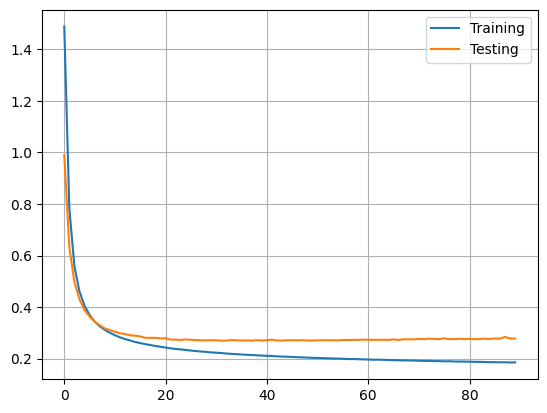

In [8]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score (loss):', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


array([[ 950,    0,    4,    3,    0,    7,    6,    5,    3,    2],
       [   0, 1103,    4,    4,    1,    1,    3,    2,   17,    0],
       [  12,    8,  939,   12,   12,    4,   12,   10,   21,    2],
       [  10,    0,   20,  910,    0,   24,    3,   12,   27,    4],
       [   1,    3,    8,    0,  917,    0,   14,    4,    6,   29],
       [   9,    2,    3,   39,    6,  771,   17,   11,   28,    6],
       [  12,    4,   14,    1,   10,   13,  900,    0,    3,    1],
       [   2,   12,   20,   11,    8,    4,    0,  928,    4,   39],
       [   4,    9,    5,   15,    7,   29,    5,    6,  888,    6],
       [   8,    5,    1,    9,   31,    9,    0,   23,   13,  910]],
      dtype=int64)